In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
sales_info=pd.read_csv('Company_Data.csv')
sales_info

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
sales_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
sales_info.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
sales_info.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [8]:
sales_data['ShelveLoc']=le_encoder.fit_transform(sales_data['ShelveLoc'])
sales_data['Urban']=le_encoder.fit_transform(sales_data['Urban'])
sales_data['US']=le_encoder.fit_transform(sales_data['US'])

In [9]:
sales_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
sales_info

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
sales_info=sales_data.assign(sale=pd.cut(sales_data['Sales'],
                             bins=[0,4,10,15],labels=['low','medium','high']))
sales_info

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,medium
397,7.41,162,26,12,368,159,2,40,18,1,1,medium
398,5.94,100,79,7,284,95,0,50,12,1,1,medium


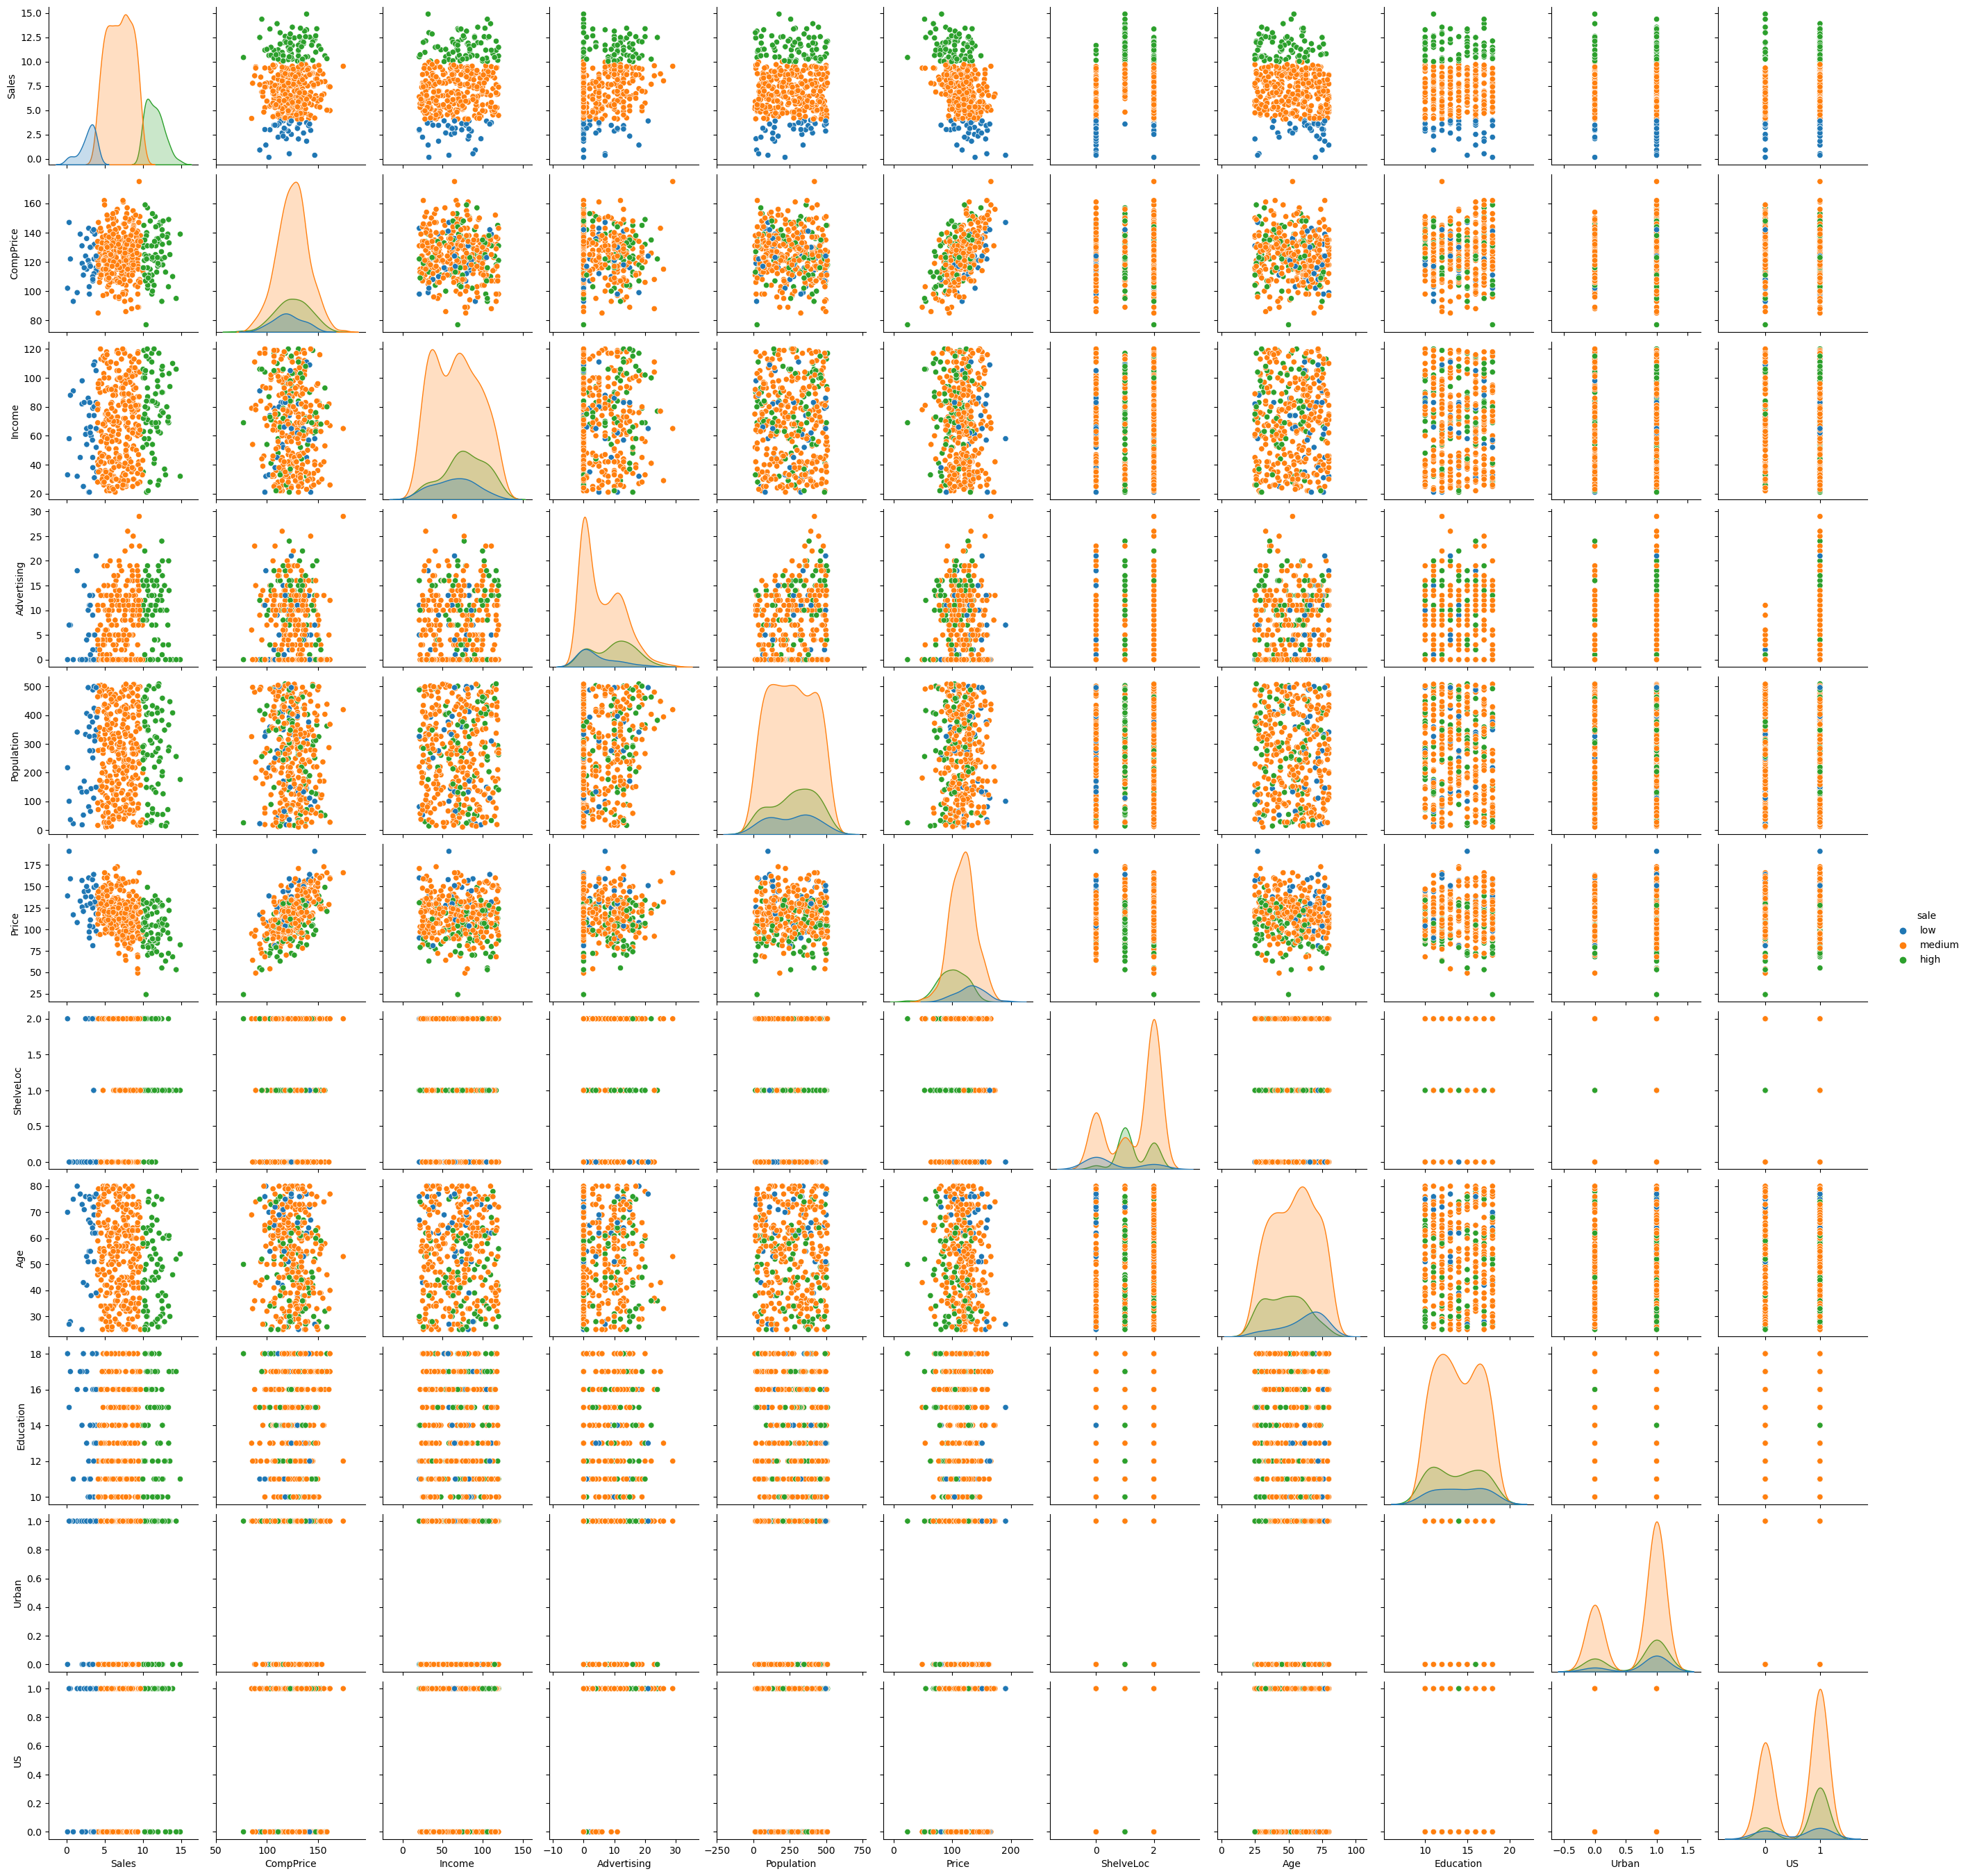

In [14]:
sns.pairplot(data=sales_info,hue='sale')
plt.show()

Model Building

In [17]:
x=sales_info.drop("sale",axis=1)
y=pd.DataFrame.astype(sales_info['sale'],dtype='object')

In [18]:
y=y.fillna('').apply(str)

In [19]:
y=le_encoder.fit_transform(y)
y

array([3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 3,

In [20]:
y=pd.DataFrame(y)

In [21]:
x.shape,y.shape

((400, 11), (400, 1))

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [23]:
x_train.shape,y_train.shape

((320, 11), (320, 1))

In [24]:
x_test.shape,y_test.shape

((80, 11), (80, 1))

Model Training

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=dt,param_grid={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5,]},cv=5)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 2}


Plot The Tree

In [27]:
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)


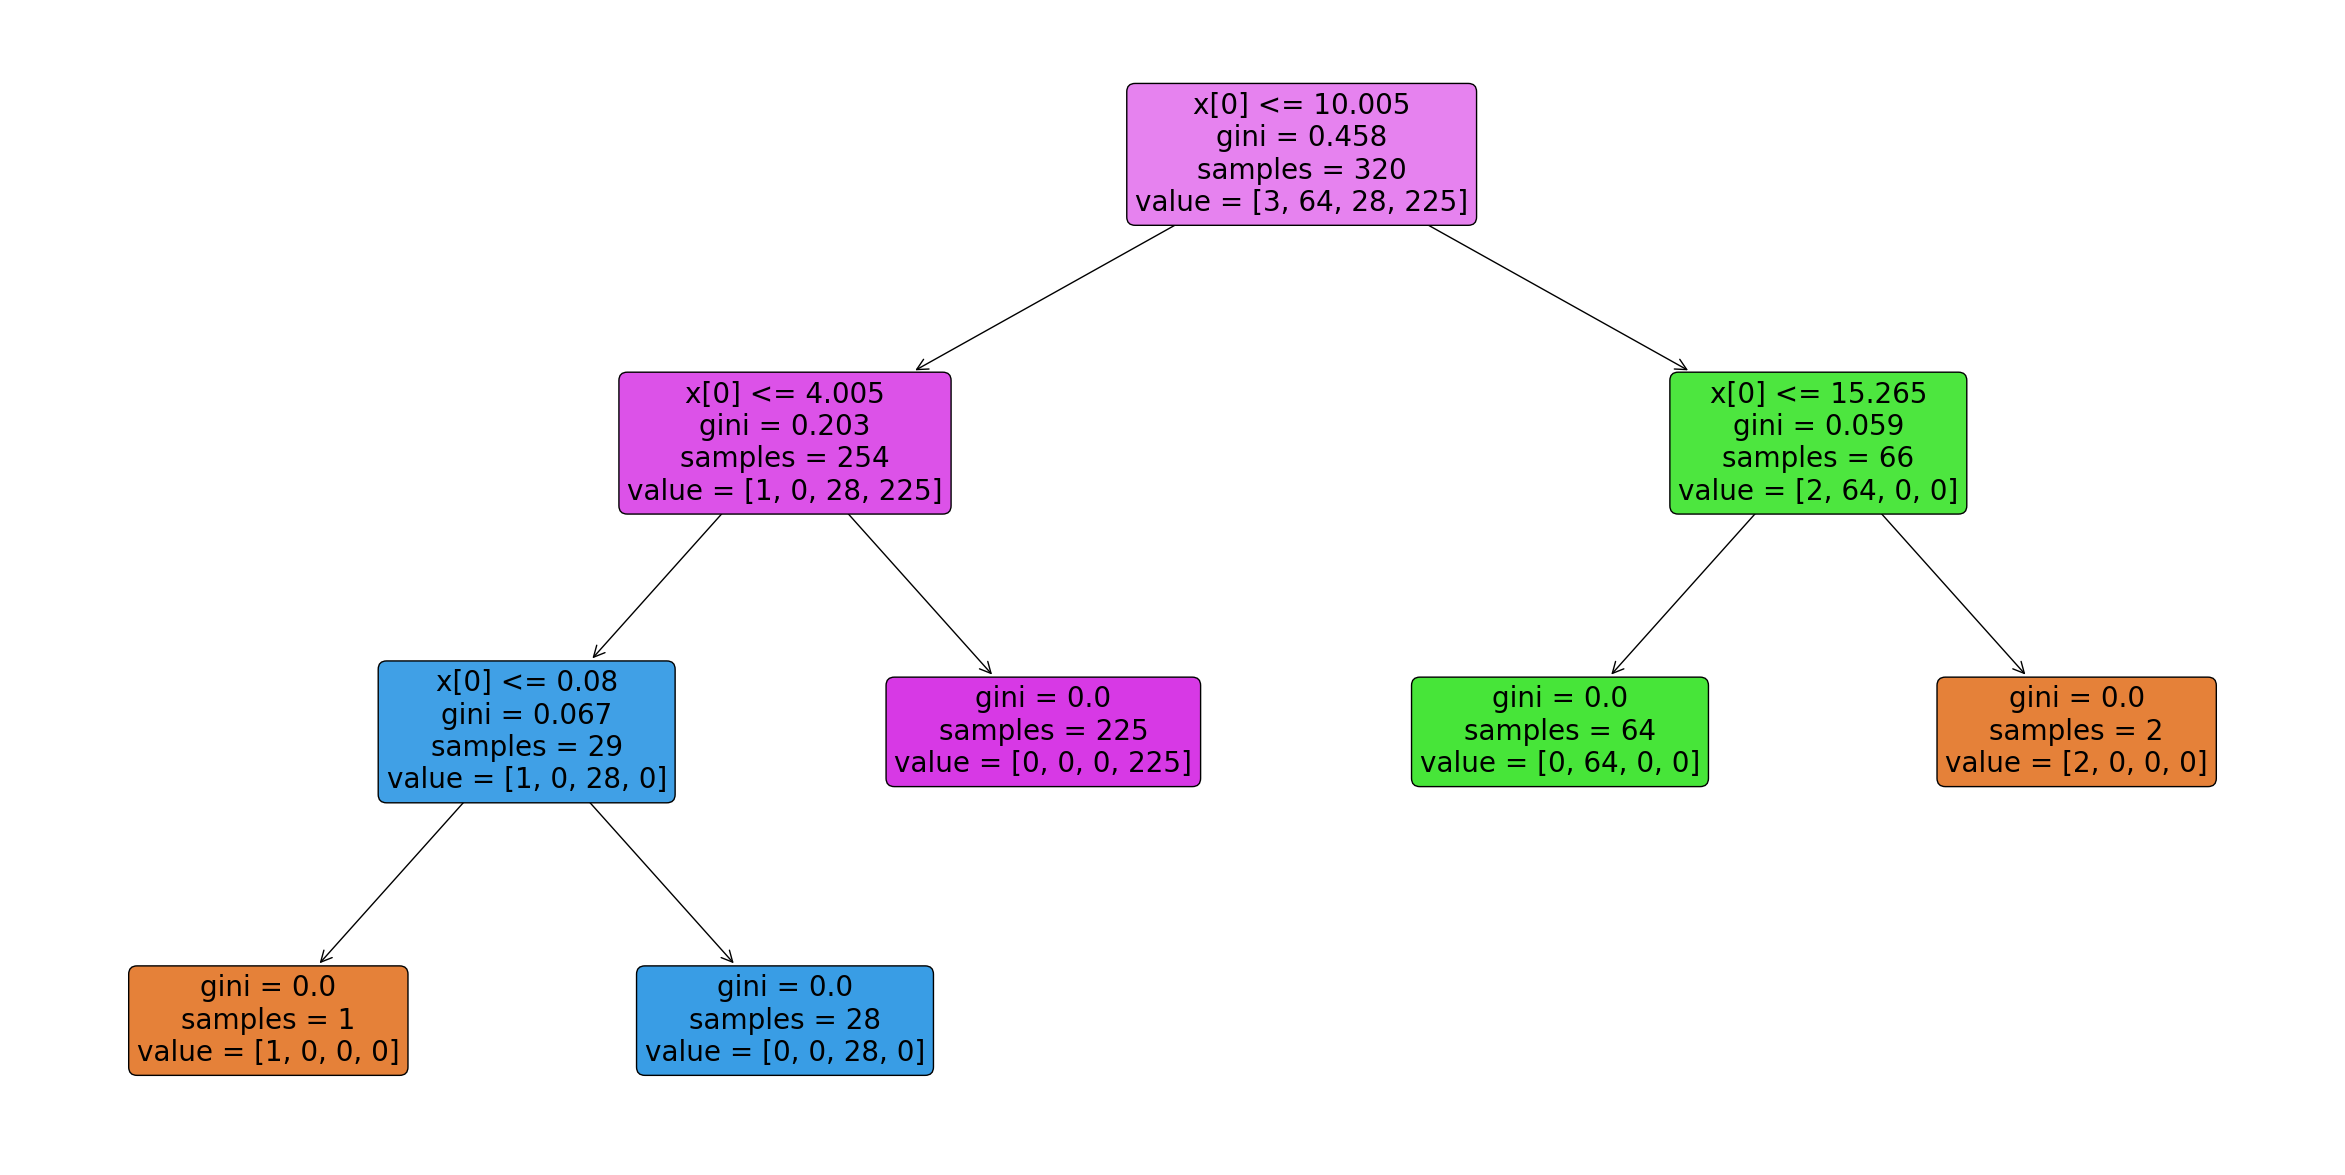

In [28]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(dt,filled=True,rounded=True,max_depth=3,impurity='entropy',fontsize=20)
plt.show()

In [29]:
y_pred=dt.predict(x_test)

Text(0.5, 63.222222222222186, 'predicted label')

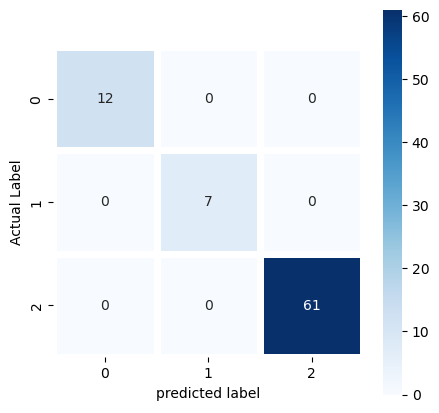

In [31]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('predicted label')

In [32]:
from sklearn import metrics 
accuracy_score=metrics.accuracy_score(y_pred,y_test)
accuracy_score

1.0

In [33]:
#dicision tree using gini criterion
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_train_pred=dt_model.predict(x_train)
y_test_pred=dt_model.predict(x_test)

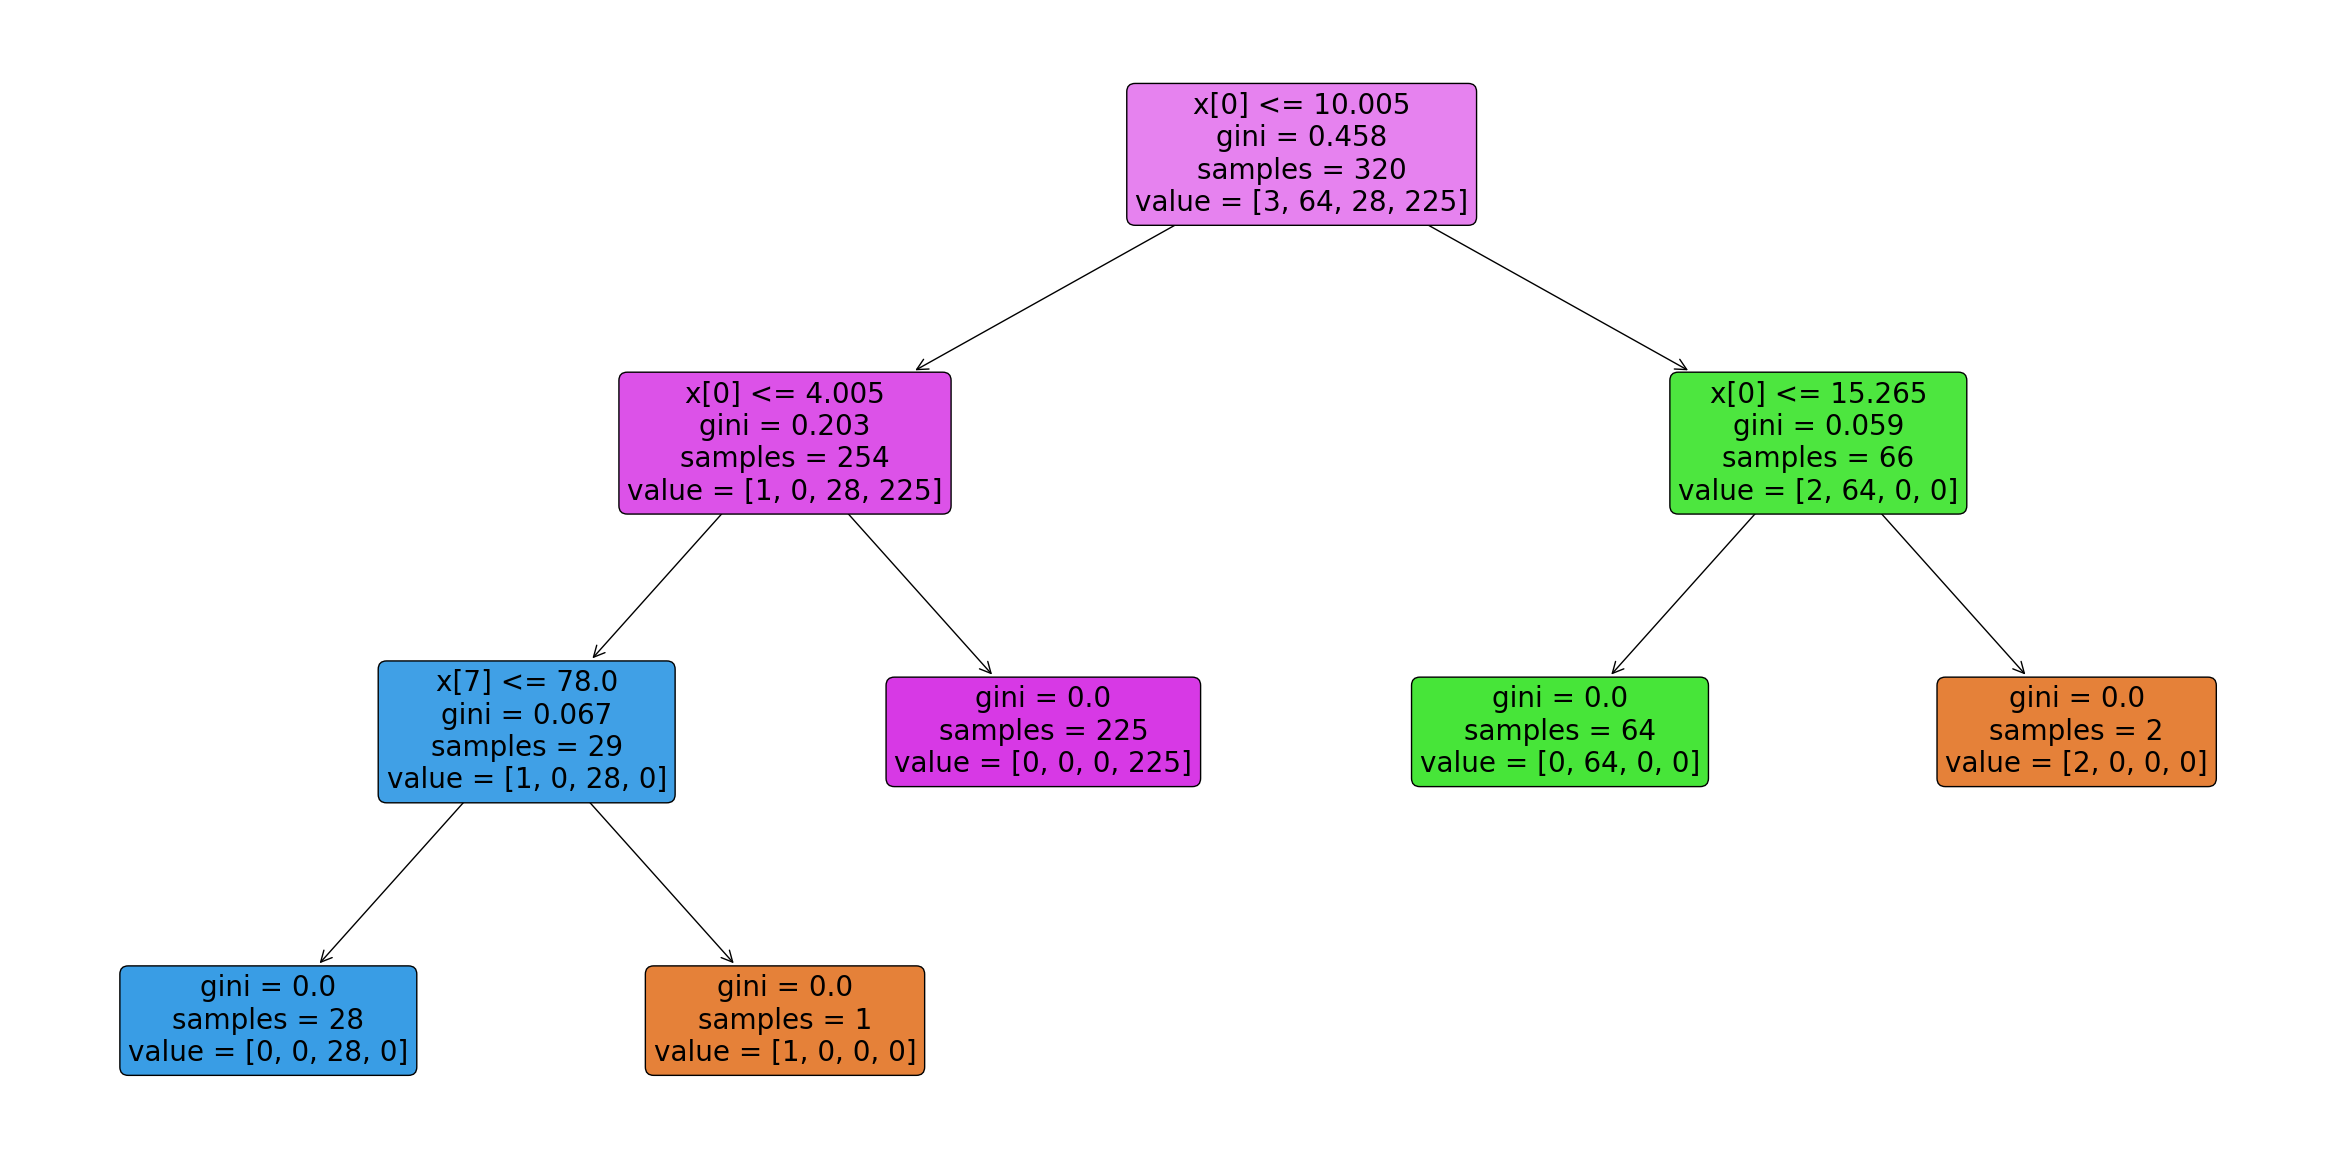

In [35]:
plt.figure(figsize=(30,15))
tree.plot_tree(dt_model,filled=True,rounded=True,max_depth=3,impurity='gini',fontsize=20)
plt.show()

Text(0.5, 63.222222222222186, 'predicted label')

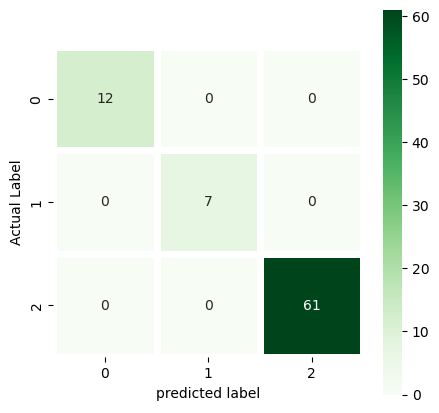

In [36]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5,annot=True,square=True,cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('predicted label')

In [37]:
accuracy_score=metrics.accuracy_score(y_pred,y_test)
accuracy_score

1.0